In [1]:
# Import standard libraries
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse
import scipy.stats as ss
import csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import pickle
from collections import defaultdict
import operator
from scipy.sparse import csr_matrix
import itertools
import os.path
import math
import pybedtools
# Import custom libraries
import process_hic_contacts_intra as phc

In [2]:
# Reload modules in case of modifications
reload(phc)

<module 'process_hic_contacts_intra' from '/home/braunger/masterthesis/code/processing_hic/IMR90_hic_preprocessing/process_hic_contacts_intra.py'>

In [3]:
# Specify directories and relevant information
genome_dir = '/home/braunger/masterthesis/data/genome_data/'
processed_hic_dir = '/home/braunger/masterthesis/save/processed_hic_data/'
saving_dir = '/home/braunger/masterthesis/save/figures/'
cell_type = 'IMR90'
resol = 250000
quality = 'MAPQGE30'
norm = 'NONE'
chr0 = 1

In [4]:
# Load raw HiC data
normalized_hic_data = phc.get_normed_hic_sparse(processed_hic_dir, cell_type, resol, quality, chr0, norm)
normalized_hic_data.head()

,locus_chr1,locus_chr2,norm_value
0,0,0,4.0
1,2,2,80.0
2,0,3,1.0
3,2,3,205.0
4,3,3,23748.0


In [5]:
# Get chromosome sizes
df_sizes = phc.get_chrom_sizes(genome_dir,resol)
chr0_size = int(df_sizes[df_sizes['chr']==str(chr0)]['size_loci'])
print(chr0_size)
df_sizes.head()

998


,chr,size,size_loci,size_roundup
0,1,249250621,998,249500000
1,2,243199373,973,243250000
2,3,198022430,793,198250000
3,4,191154276,765,191250000
4,5,180915260,724,181000000


In [6]:
# Get dense HiC dataframe
df = phc.get_dense_hic_dataframe(normalized_hic_data, chr0_size, resol)
df.head()

,0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,...,247000000,247250000,247500000,247750000,248000000,248250000,248500000,248750000,249000000,249250000
0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500000,0.0,0.0,80.0,205.0,33.0,18.0,8.0,7.0,5.0,1.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
750000,0.0,0.0,0.0,23748.0,6508.0,1845.0,448.0,266.0,186.0,128.0,...,6.0,11.0,8.0,7.0,3.0,2.0,0.0,0.0,22.0,0.0
1000000,0.0,0.0,0.0,0.0,27282.0,4429.0,615.0,277.0,187.0,108.0,...,3.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,7.0,0.0


In [7]:
# Symmetrize
df = df+df.transpose()
df.values[[np.arange(df.shape[0])]*2] = df.values[[np.arange(df.shape[0])]*2]/2
df.head()

,0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,...,247000000,247250000,247500000,247750000,248000000,248250000,248500000,248750000,249000000,249250000
0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500000,0.0,0.0,80.0,205.0,33.0,18.0,8.0,7.0,5.0,1.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
750000,1.0,0.0,205.0,23748.0,6508.0,1845.0,448.0,266.0,186.0,128.0,...,6.0,11.0,8.0,7.0,3.0,2.0,0.0,0.0,22.0,0.0
1000000,0.0,0.0,33.0,6508.0,27282.0,4429.0,615.0,277.0,187.0,108.0,...,3.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,7.0,0.0


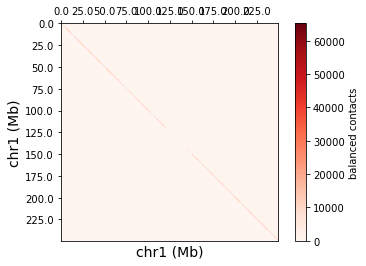

In [8]:
# Plot HiC dense dataframe
%matplotlib inline
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df, chr0, '', hic_plots_dir, show=True)

In [9]:
# Get centromere locations
df_centrom = phc.get_centromere_locations(genome_dir)
df_centrom.head()

,bin,chrom,chromStart,chromEnd,ix,n,size,type,bridge
0,23,chr1,121535434,124535434,1270,N,3000000,centromere,no
1,20,chr2,92326171,95326171,770,N,3000000,centromere,no
2,2,chr3,90504854,93504854,784,N,3000000,centromere,no
3,1,chr4,49660117,52660117,447,N,3000000,centromere,no
4,14,chr5,46405641,49405641,452,N,3000000,centromere,no


In [10]:
# Filter out centromeres
filter_size = 2000000
df = phc.filter_centromeres(df, chr0, 'row', df_centrom, filter_size, resol)
df = phc.filter_centromeres(df, chr0, 'col', df_centrom, filter_size, resol)

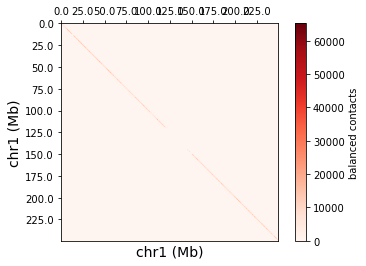

In [11]:
# Plot HiC data after filtering out centromeres
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df, chr0, '', hic_plots_dir, show=True)

In [12]:
# Load repeats data
df_repeats = phc.load_repeats_data(genome_dir)
df_repeats.head()

,genoname,genoStart,genoEnd,repLength
0,chr1,10000,10468,468
1,chr1,10468,11447,979
2,chr1,11503,11675,172
3,chr1,11677,11780,103
4,chr1,15264,15355,91


In [13]:
# Find repeat-covered loci to filter out
chr_list = np.arange(1,22+1)
dic_repeats_tofilter = phc.find_repeat_locations(df_repeats, chr_list, df_sizes, resol)

In [14]:
# Filter repeats for chr0
df = phc.filter_repeats(df, chr0, dic_repeats_tofilter, 'row')
df = phc.filter_repeats(df, chr0, dic_repeats_tofilter, 'col')

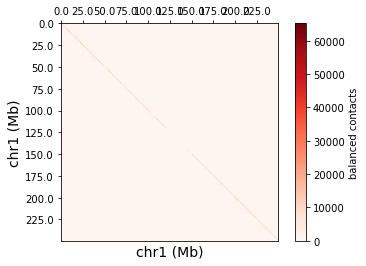

In [15]:
# Plot HiC data after filtering out repeats
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df, chr0, '', hic_plots_dir, show=True)

In [16]:
# Log-transform dataframe
df_transformed = phc.log_transform(df)

In [17]:
# Filter out outliers
df_transformed = phc.filter_outliers(df_transformed)

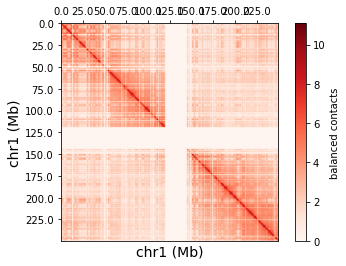

In [18]:
# Plot HiC data after filtering out centromeres, repeats and outliers
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df_transformed, chr0, plotname, hic_plots_dir, show=True)